In [54]:
import yaml
import os, fnmatch, re
import matplotlib.pyplot as plt

In [55]:
def data_extraction(location, test, configfile):
    p2ptcpvals = []
    p2stcpvals = []
    custom_configs = [] 
    file_list = os.listdir(location)
    file_list.sort(key=lambda x:x[-14:])
    file_list.sort(key=len)

    for file in file_list:
        if fnmatch.fnmatch(file, test + '*.yaml'):
            if fnmatch.fnmatch(file, '*custom0*'):
                continue
            custom_index = re.search("custom\d+", file).group(0)
            # print(custom_index)
            custom_index = int(custom_index[6:])
            with open(configfile, 'r') as configuration:
                try: 
                    data = yaml.safe_load(configuration)
                    custom_configs = data['parameters']['custom-tests']
                except yaml.YAMLError as yerr:
                    print(yerr)
                    print('Could not open config file')
            with open(location + '/' + file, 'r') as stream:
                try:
                    data = yaml.safe_load(stream)
                    p2ptcpvals.append((int(custom_configs[custom_index][-6:]), data['data']['pod2pod']['custom']['bandwidth']))
                    p2stcpvals.append((int(custom_configs[custom_index][-6:]), data['data']['pod2svc']['custom']['bandwidth']))
                except yaml.YAMLError as yerr:
                    print(yerr)
                    print("Could not open test file")

    return p2ptcpvals, p2stcpvals


In [56]:
def network_plotting(p2ptcpvals, p2stcpvals, focused_window=False, testname=''):
    zip(*p2ptcpvals)
    zip(*p2stcpvals)
    fig, scat = plt.subplots(1, 1)
    fig.suptitle(testname + "\nTCP windows' comparison")
    fig.set_figheight(8)
    fig.set_figwidth(15)
    scat.set_ylabel("Bandwidth [Mbit/s]")
    scat.set_xlabel("TCP Window size [bytes]")
    scat.scatter(*zip(*p2ptcpvals), label='P2P TCP', color='red')
    scat.scatter(*zip(*p2stcpvals), label='P2S TCP', color='green')

    if focused_window:
        scat.axis([31000, 67000, 650, 1000])

    scat.legend()

### Caliconetwork

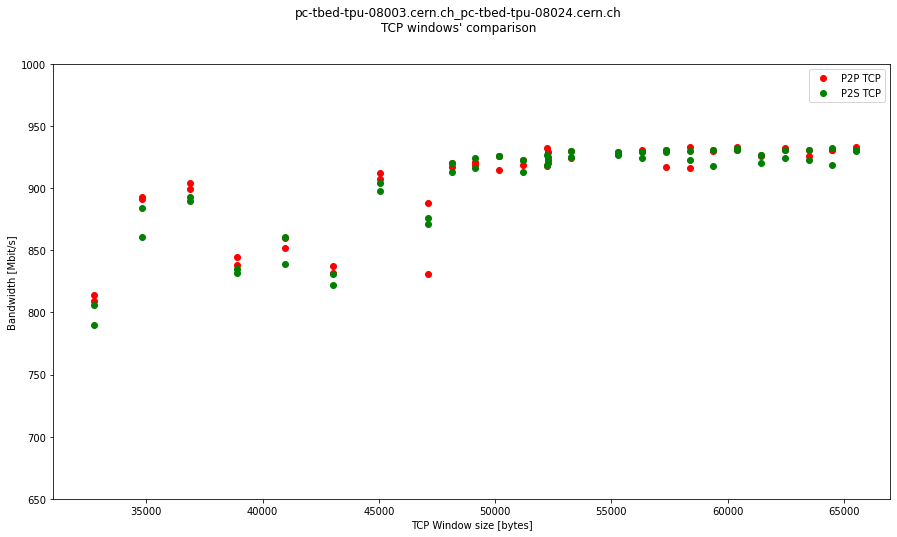

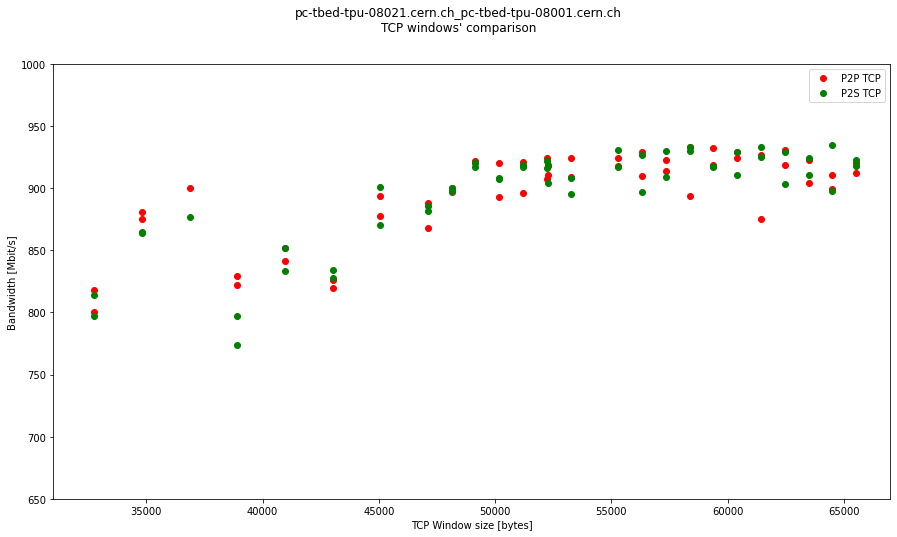

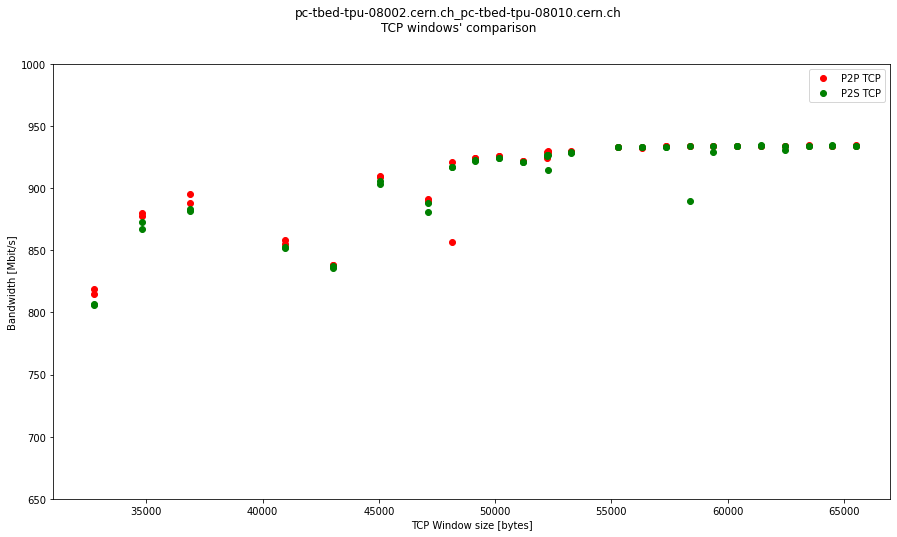

In [57]:
data_loc = "tcp-window-tests/tbed/results/caliconetwork5"
test1 = "pc-tbed-tpu-08003.cern.ch_pc-tbed-tpu-08024.cern.ch"
test2 = "pc-tbed-tpu-08021.cern.ch_pc-tbed-tpu-08001.cern.ch"
test3 = "pc-tbed-tpu-08002.cern.ch_pc-tbed-tpu-08010.cern.ch"
conf = "tcp-window-tests/tbed/configfiles/tcp-window-test-caliconetwork5.yaml"
a, b = data_extraction(data_loc, test1, conf)
c, d = data_extraction(data_loc, test2, conf)
e, f = data_extraction(data_loc, test3, conf)

network_plotting(a, b, focused_window=True, testname=test1)
network_plotting(c, d, focused_window=True, testname=test2)
network_plotting(e, f, focused_window=True, testname=test3)

### Hostnetwork

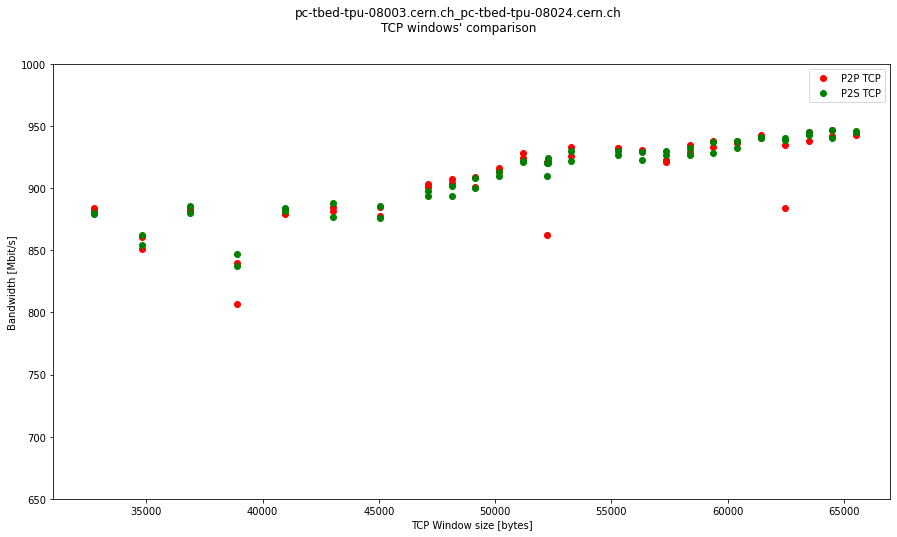

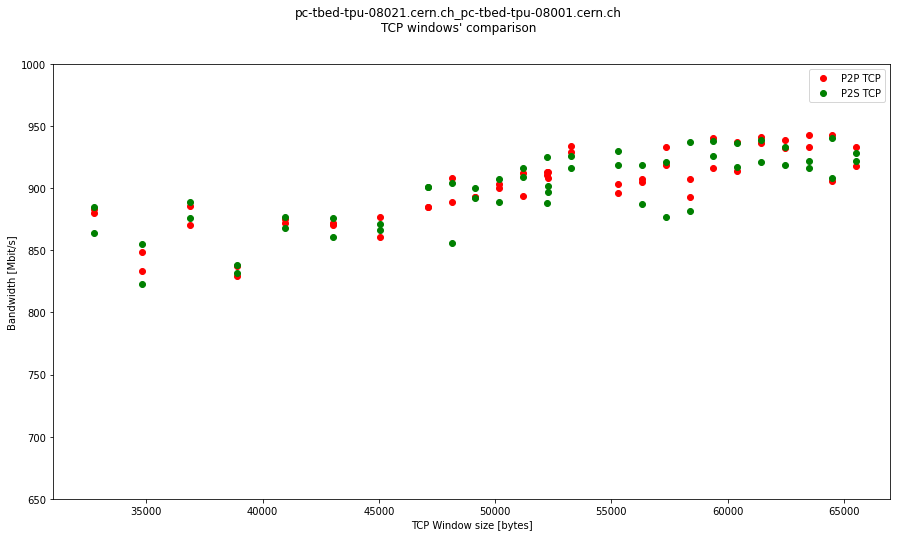

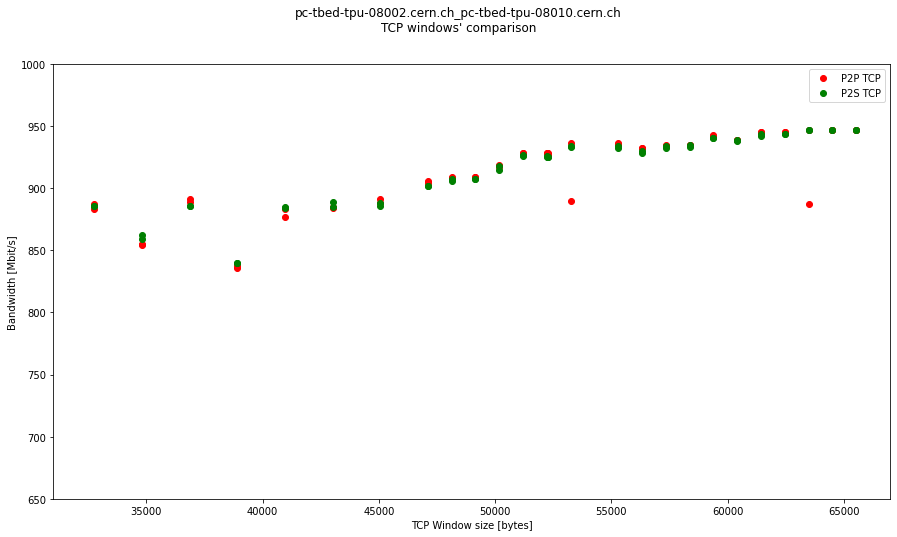

In [58]:
data_loc = "tcp-window-tests/tbed/results/hostnetwork5"
test1 = "pc-tbed-tpu-08003.cern.ch_pc-tbed-tpu-08024.cern.ch"
test2 = "pc-tbed-tpu-08021.cern.ch_pc-tbed-tpu-08001.cern.ch"
test3 = "pc-tbed-tpu-08002.cern.ch_pc-tbed-tpu-08010.cern.ch"
conf = "tcp-window-tests/tbed/configfiles/tcp-window-test-hostnetwork5.yaml"
a, b = data_extraction(data_loc, test1, conf)
c, d = data_extraction(data_loc, test2, conf)
e, f = data_extraction(data_loc, test3, conf)

network_plotting(a, b, focused_window=True, testname=test1)
network_plotting(c, d, focused_window=True, testname=test2)
network_plotting(e, f, focused_window=True, testname=test3)